## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, andvisualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import json

with open('/content/drive/MyDrive/DS-SB/Take Home_1_challenge/logins.json') as json_file:
    logins = json.load(json_file)


In [52]:
#print(logins)

In [53]:
logins=pd.DataFrame(logins)

In [54]:
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [55]:
logins['login_time']=pd.to_datetime(logins['login_time'])

In [56]:
logins.set_index('login_time', inplace=True)
logins['agg_count']=1
logins.sort_index(inplace=True)
logins= logins.resample("15min").sum()
logins

,agg_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [57]:
len(logins)

9788

<Axes: xlabel='login_time'>

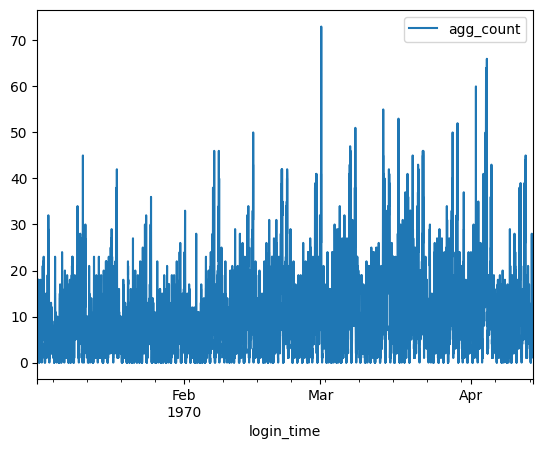

In [58]:
logins.plot()

<ipython-input-59-a0fa8a84d4ef>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  logins['1970-01'].plot(figsize=(12,6))


<Axes: xlabel='login_time'>

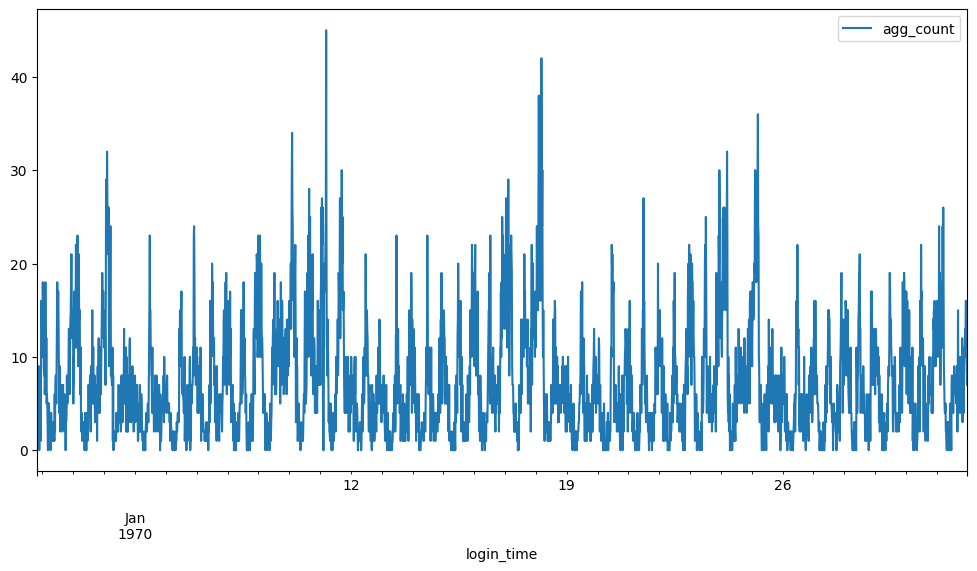

In [59]:
logins['1970-01'].plot(figsize=(12,6))

<Axes: xlabel='login_time'>

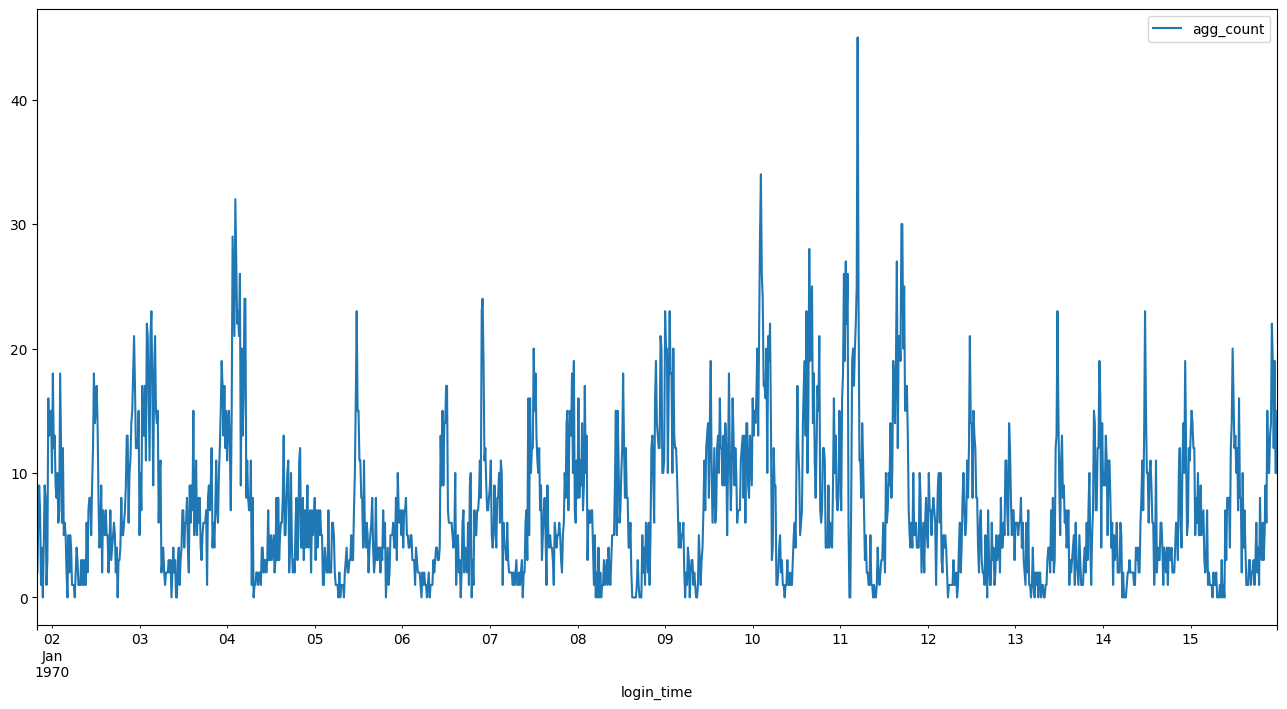

In [60]:
logins['1970-01-01':'1970-01-15'].plot(figsize=(16,8))

<Axes: xlabel='login_time'>

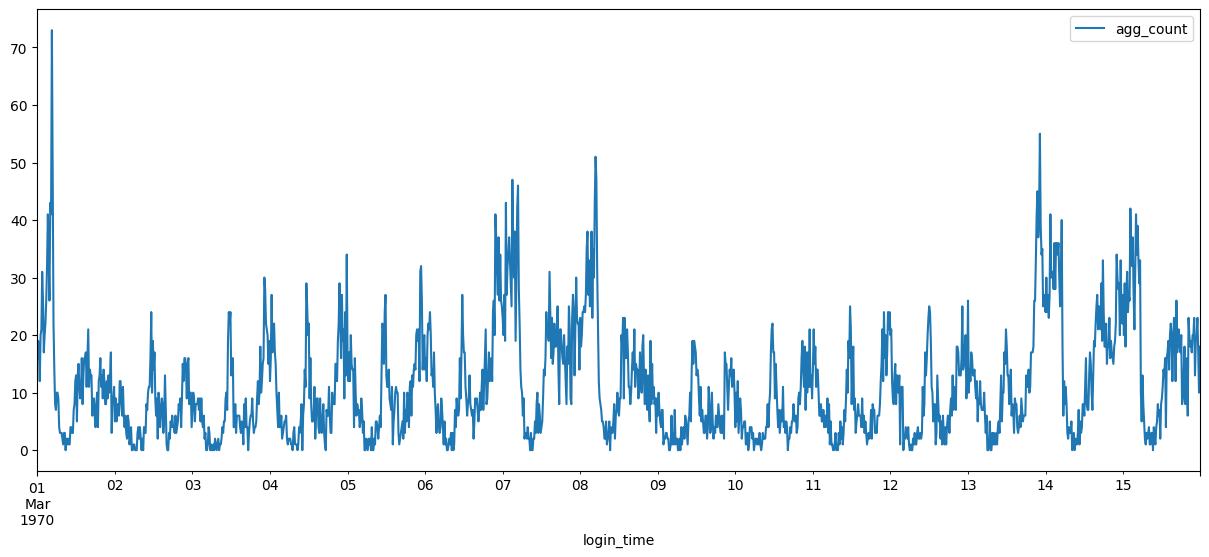

In [61]:
logins['1970-03-01':'1970-03-15'].plot(figsize=(15,6))

**We can observe the weekly seasonality in the data, it shows that the logins are higher in the weekends Friday, Saturday and sunday**

In [62]:
import datetime
datetime.datetime.strptime('02 03 1970', '%d %m %Y').weekday()

0

**Saturday**

<ipython-input-63-c9124fbd0bf4>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(x=logins['1970-03-02'].index,y='agg_count', data=logins['1970-03-02'], label='Monday', ax=ax1)
<ipython-input-63-c9124fbd0bf4>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(x=logins['1970-03-03'].index,y='agg_count', data=logins['1970-03-03'], label='Tuesday', ax=ax2)
<ipython-input-63-c9124fbd0bf4>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(x=logins['1970-03-04

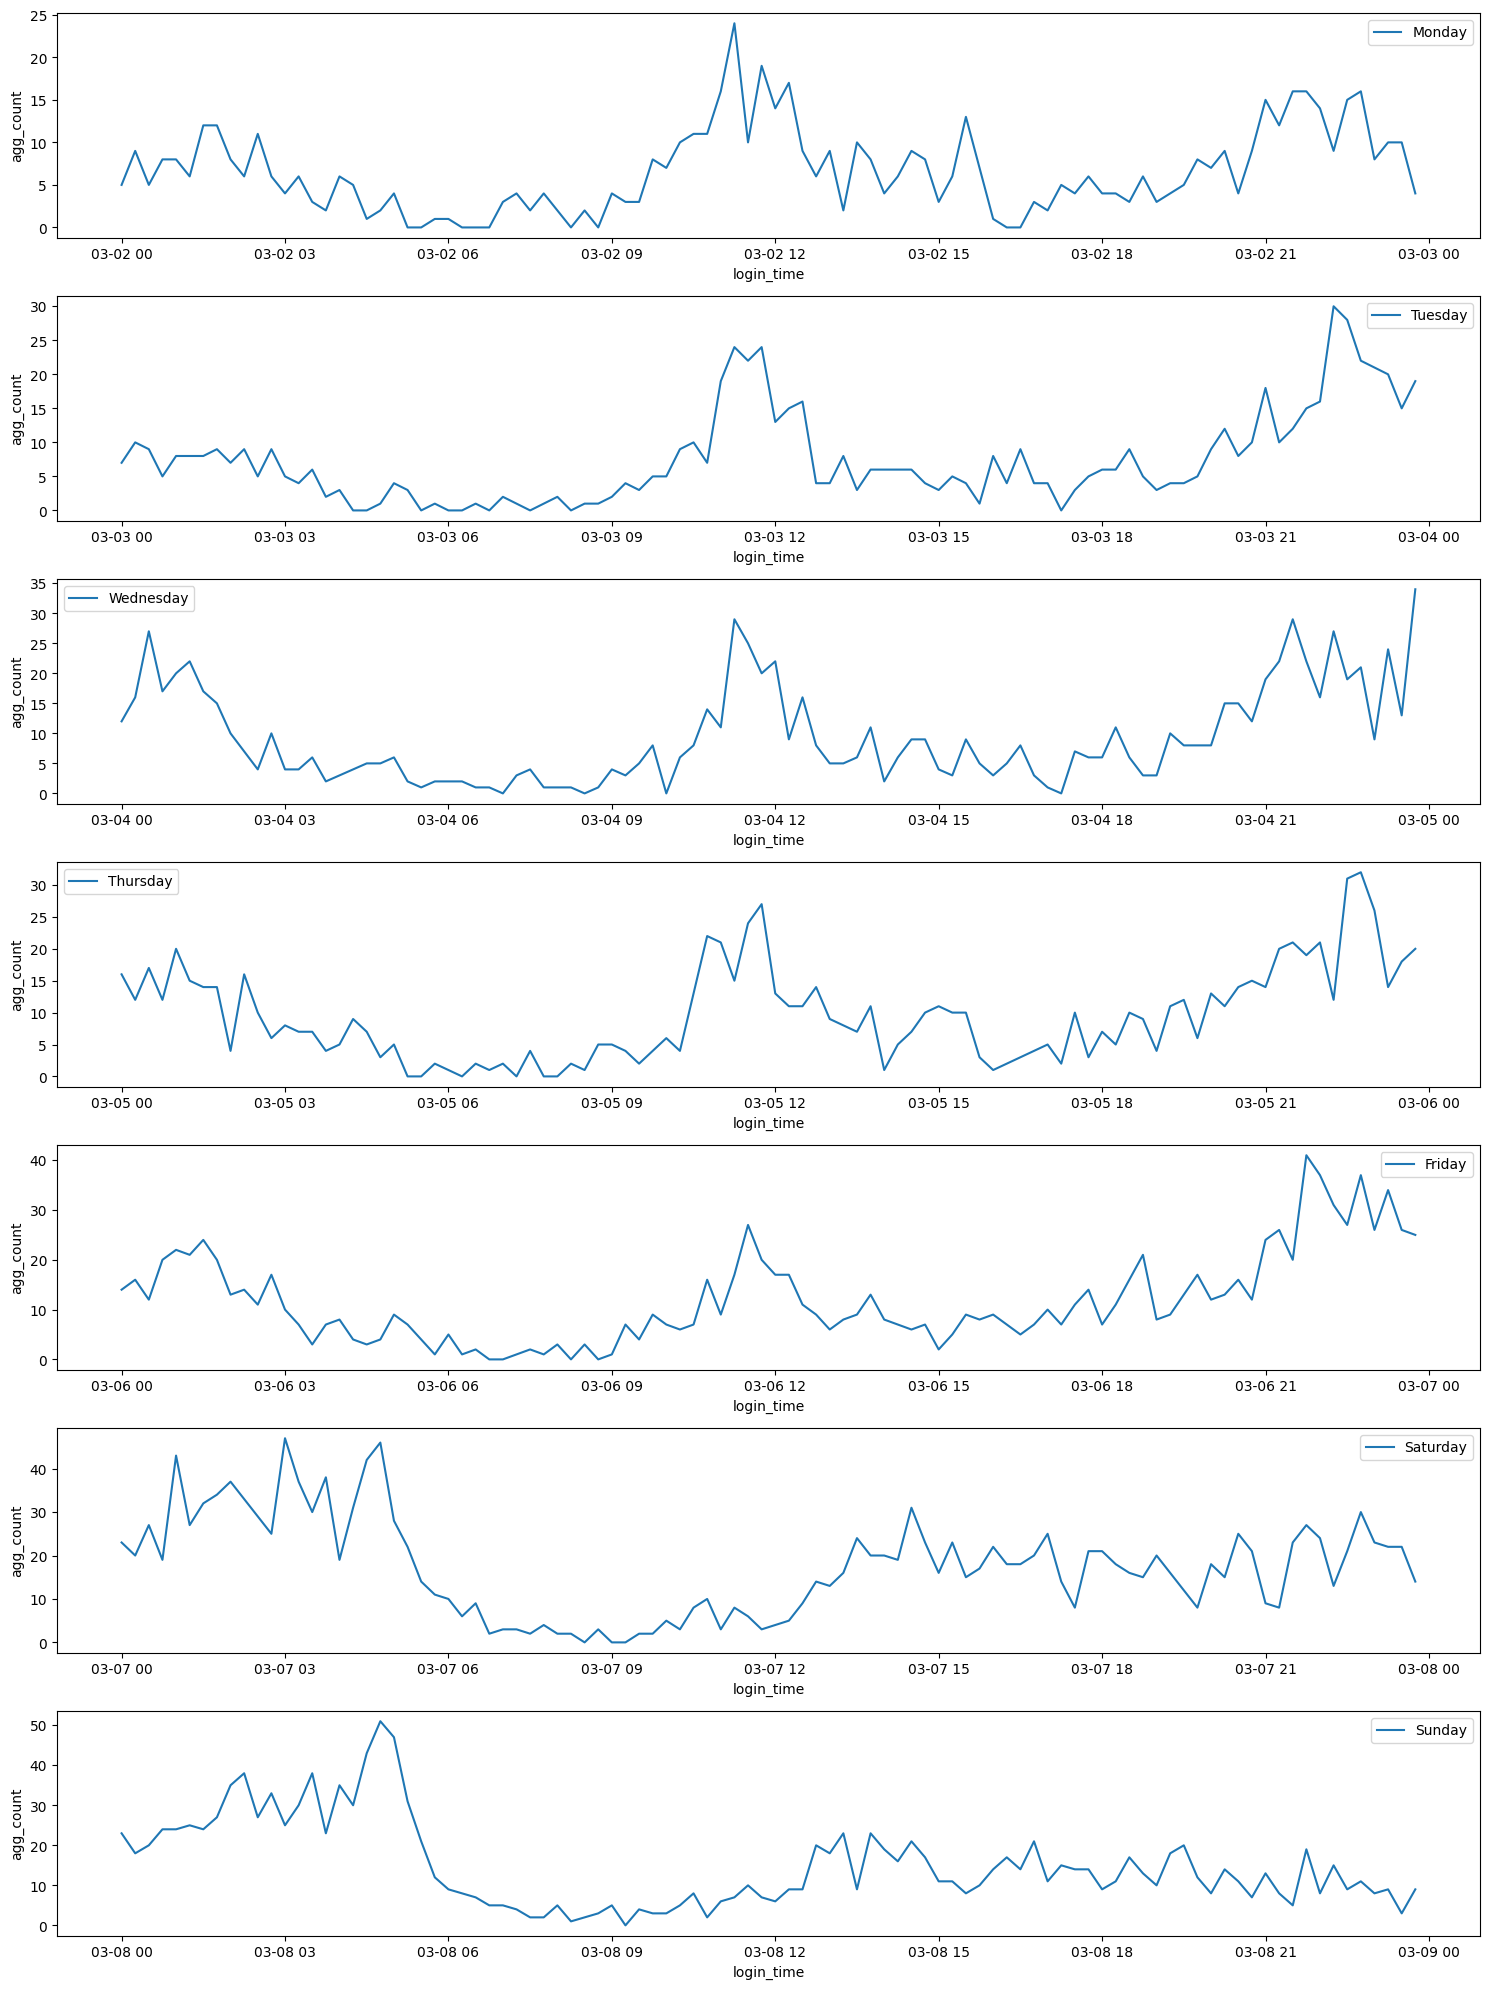

In [63]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) =plt.subplots(nrows=7,ncols=1,figsize=(15,20))
sns.lineplot(x=logins['1970-03-02'].index,y='agg_count', data=logins['1970-03-02'], label='Monday', ax=ax1)
sns.lineplot(x=logins['1970-03-03'].index,y='agg_count', data=logins['1970-03-03'], label='Tuesday', ax=ax2)
sns.lineplot(x=logins['1970-03-04'].index,y='agg_count', data=logins['1970-03-04'], label='Wednesday', ax=ax3)
sns.lineplot(x=logins['1970-03-05'].index,y='agg_count', data=logins['1970-03-05'], label='Thursday', ax=ax4)
sns.lineplot(x=logins['1970-03-06'].index,y='agg_count', data=logins['1970-03-06'], label='Friday', ax=ax5)
sns.lineplot(x=logins['1970-03-07'].index,y='agg_count', data=logins['1970-03-07'], label='Saturday', ax=ax6)
sns.lineplot(x=logins['1970-03-08'].index,y='agg_count', data=logins['1970-03-08'], label='Sunday', ax=ax7)

fig.tight_layout()



In [64]:
import datetime
datetime.datetime.strptime('05 01 1970', '%d %m %Y').weekday()

0

<ipython-input-65-1dd15b4cee15>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(x=logins['1970-01-05'].index,y='agg_count', data=logins['1970-01-05'], label='Monday', ax=ax1)
<ipython-input-65-1dd15b4cee15>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(x=logins['1970-01-06'].index,y='agg_count', data=logins['1970-01-06'], label='Tuesday', ax=ax2)
<ipython-input-65-1dd15b4cee15>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(x=logins['1970-01-07

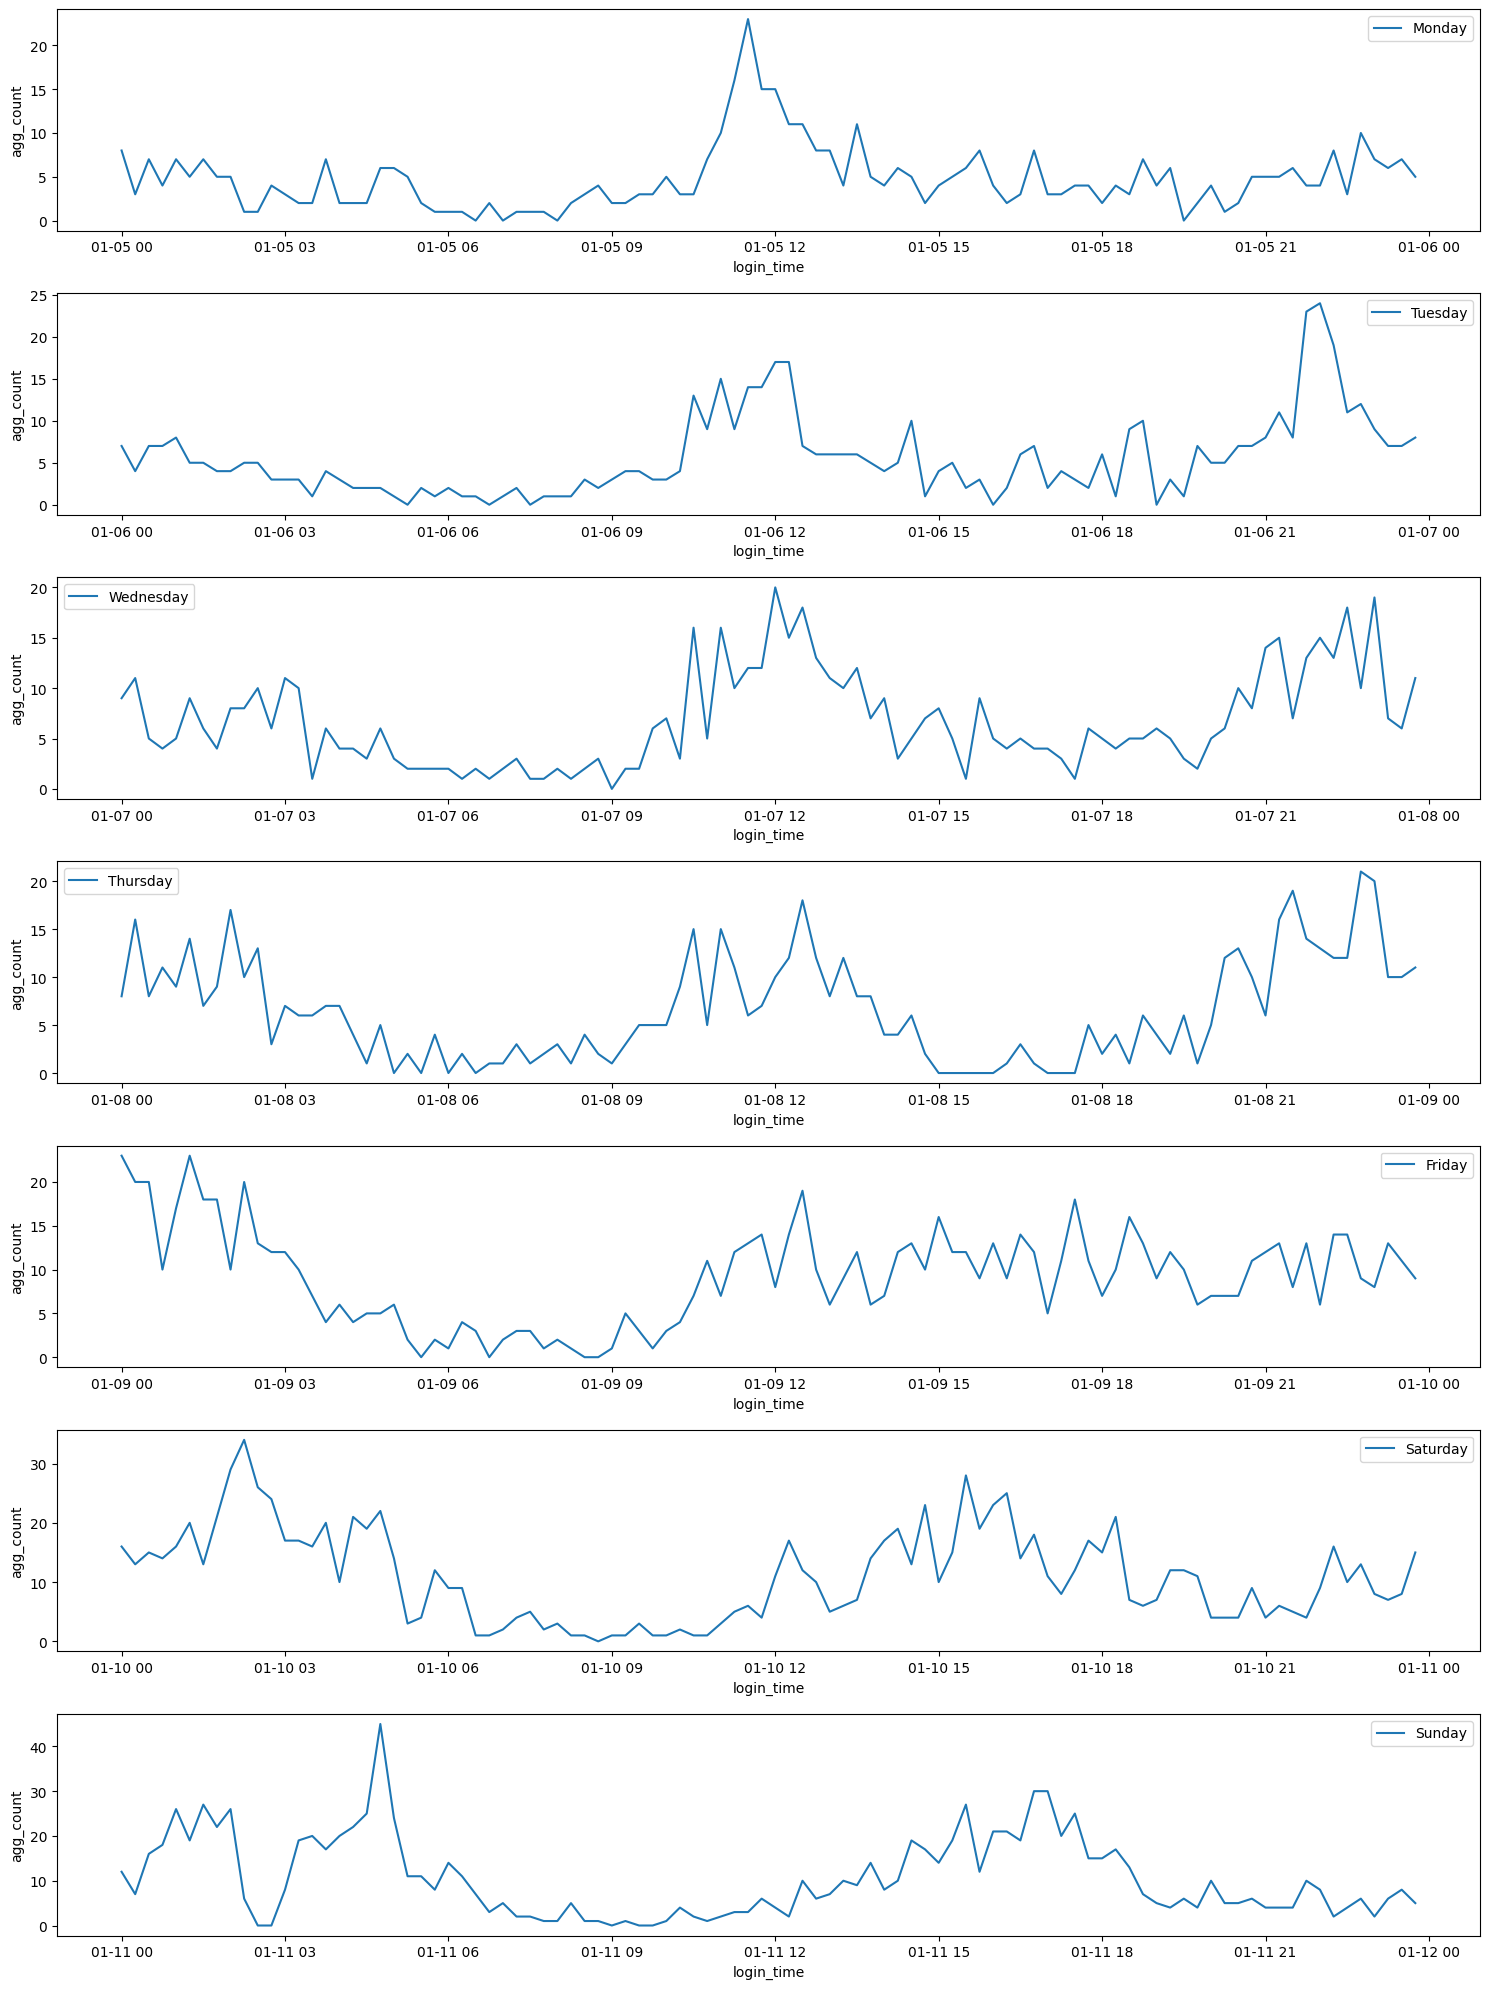

In [65]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) =plt.subplots(nrows=7,ncols=1,figsize=(15,20))
sns.lineplot(x=logins['1970-01-05'].index,y='agg_count', data=logins['1970-01-05'], label='Monday', ax=ax1)
sns.lineplot(x=logins['1970-01-06'].index,y='agg_count', data=logins['1970-01-06'], label='Tuesday', ax=ax2)
sns.lineplot(x=logins['1970-01-07'].index,y='agg_count', data=logins['1970-01-07'], label='Wednesday', ax=ax3)
sns.lineplot(x=logins['1970-01-08'].index,y='agg_count', data=logins['1970-01-08'], label='Thursday', ax=ax4)
sns.lineplot(x=logins['1970-01-09'].index,y='agg_count', data=logins['1970-01-09'], label='Friday', ax=ax5)
sns.lineplot(x=logins['1970-01-10'].index,y='agg_count', data=logins['1970-01-10'], label='Saturday', ax=ax6)
sns.lineplot(x=logins['1970-01-11'].index,y='agg_count', data=logins['1970-01-11'], label='Sunday', ax=ax7)

fig.tight_layout()



**Two conclusion can be drawn from the results:
<br>
1) Logins are higher in weekends than in weekdays
<br>
2) Logins shows two patterns: For weekdays (Except Monday) logins peaked around noon, around 3 am and after 9pm whereas For weekends logins peaked in the early morning (2-5 am) and afternoon after 3 pm, For Monday the logins are less compared to the rest of the week and peaked around noon.**

## Part-2: Experiment and Metric Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
    

**1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

I assume there must be two key measures of success of this experiment, first increase in the availibility of the drivers in both cities to fulfill the demand and second, the revenue of the company should be increased by offsetting the cost of reimbursing the toll.

**2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
<br>
a. how you will implement the experiment
<br>
b. what statistical test(s) you will conduct to verify the significance of the observation
<br>
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.**

The first step in this study is to measure the effectiveness of reimbursing the toll in increasing the drivers crossing the cities. For this we need to track the drivers crossing the bridge, this can be done by implementing some sensors in the vehicles. The another step is to measure the net increase in revenue earned by the company by the implementation of this stretegy. For this we need to calculate the revenue of the company before and after the implementation of the changes by offsetting the cost of toll reimbursement.
<br>
For both of these measures we should perform ANOVA hypothesis testing to measure the difference in the average no. of times the driver crossed the bridge and help to increase the revenue before and after reimbursing the toll. Our null hypothesis will be there is no significant differences irrespective of our proposed strategy.
<br>
For the interpretation of the results, we need to have a graph displaying the change in percentage of drivers who cross the bridge from the city with greater demand to the city with less demand in a given period is significantly large. However, if the change is small we would suspect that reimbursing the drivers’ toll fees may not ba a good stretegy, we may need to look for other alternatives to encourage drivers to cross the bridge.

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
<br>
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
import json

with open('/content/drive/MyDrive/DS-SB/Take Home_1_challenge/ultimate_data_challenge.json') as json_file:
    ultimate_data = json.load(json_file)
df=pd.DataFrame(ultimate_data)


In [68]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [69]:
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])

In [70]:
df['last_trip_date'].describe()

<ipython-input-70-0832a502f142>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['last_trip_date'].describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [71]:
Days=df['last_trip_date'].max()-df['last_trip_date']
df['days_since_last_trip']=(Days/ np.timedelta64(1, 'D')).astype(int)
df['days_since_last_trip']

0         14
1         57
2        175
3          2
4        108
        ... 
49995     26
49996    157
49997     40
49998    167
49999     72
Name: days_since_last_trip, Length: 50000, dtype: int64

In [72]:
df['signup_date']=pd.to_datetime(df['signup_date'])
Days=df['last_trip_date'].max()-df['signup_date']
df['days_since_signup']=(Days/ np.timedelta64(1, 'D')).astype(int)
df['days_since_signup']

0        157
1        153
2        176
3        172
4        155
        ... 
49995    157
49996    158
49997    151
49998    168
49999    164
Name: days_since_signup, Length: 50000, dtype: int64

In [73]:
df['retained']=['yes' if df['days_since_last_trip'][i]<=30 else 'no' for i in range(len(df)) ]
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,157,yes
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,153,no
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,176,no
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,172,yes
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108,155,no


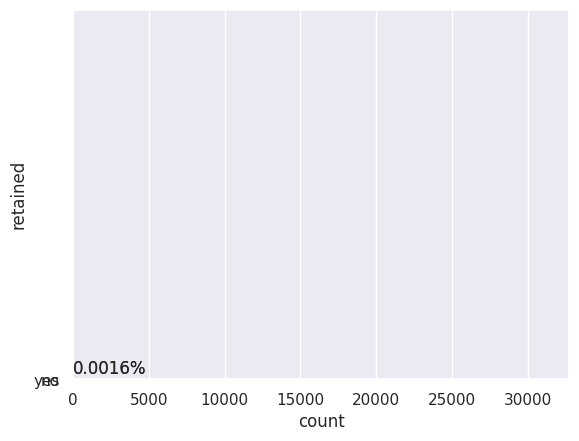

In [74]:
sns.set()
ax=sns.countplot(df['retained'])
plt.ylim([0,35000])
for p in ax.patches:
        ax.annotate('{}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.2, p.get_height()+500))

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  days_since_last_trip    50000 non-null  int64 

<Axes: xlabel='retained', ylabel='trips_in_first_30_days'>

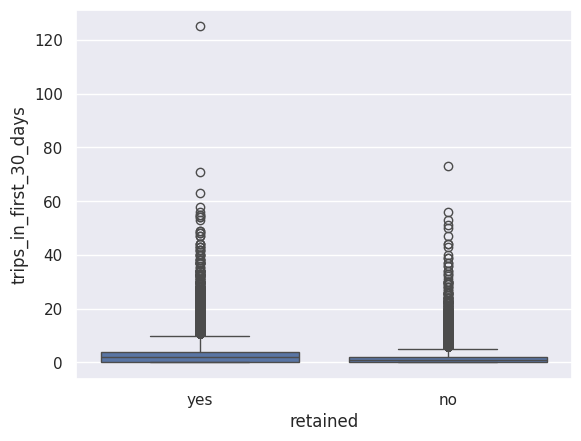

In [76]:
sns.boxplot(data=df, y='trips_in_first_30_days', x='retained')

<Axes: xlabel='retained', ylabel='weekday_pct'>

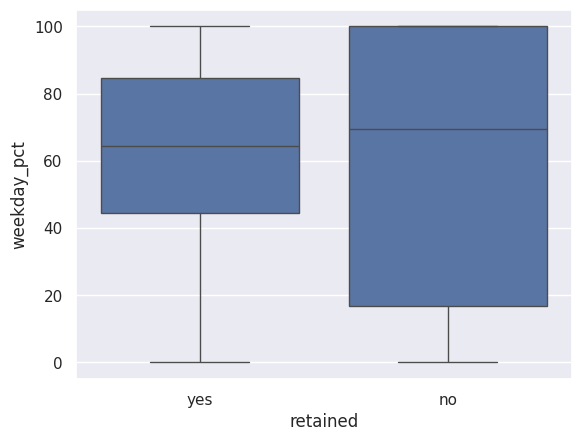

In [77]:
sns.boxplot(data=df, y='weekday_pct', x='retained')

<Axes: xlabel='retained', ylabel='avg_dist'>

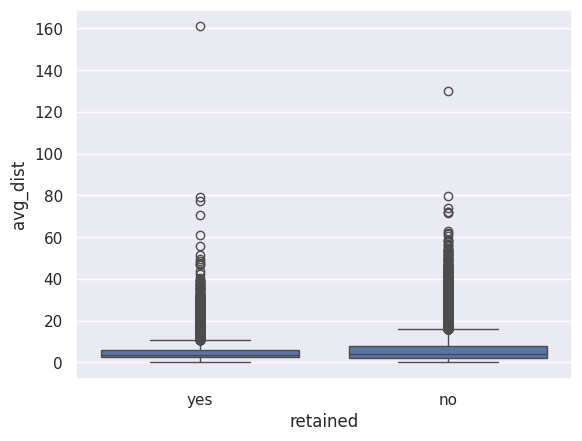

In [78]:
sns.boxplot(data=df, x='retained', y='avg_dist')

<Axes: xlabel='retained', ylabel='days_since_signup'>

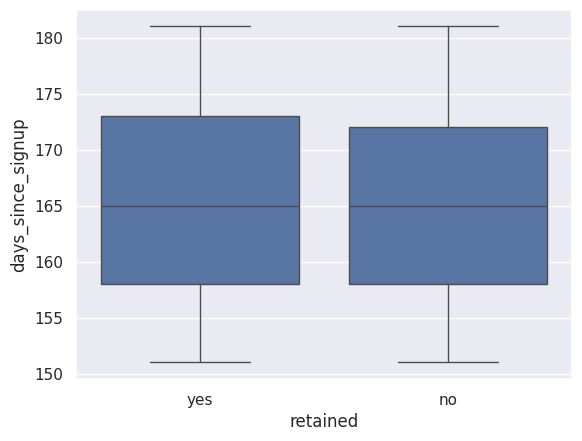

In [79]:
sns.boxplot(data=df, x='retained', y='days_since_signup')

<Axes: xlabel='retained', ylabel='days_since_last_trip'>

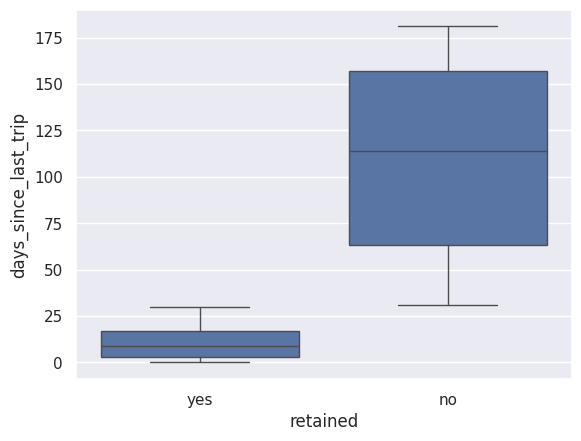

In [80]:
sns.boxplot(data=df, x='retained', y='days_since_last_trip')

<Axes: xlabel='retained', ylabel='avg_rating_of_driver'>

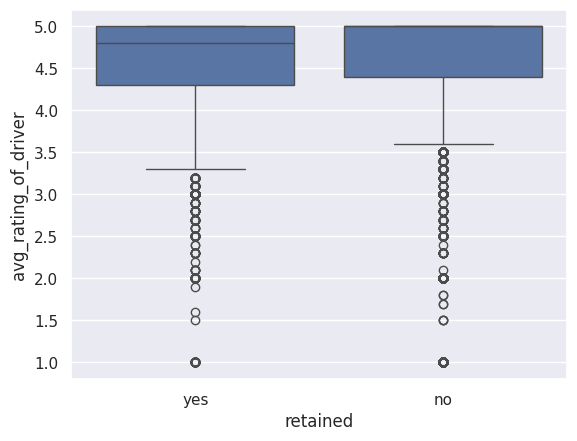

In [81]:
sns.boxplot(data=df, x='retained', y='avg_rating_of_driver')

In [82]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [83]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'days_since_last_trip', 'days_since_signup',
       'retained'],
      dtype='object')

<ipython-input-84-42c19d2e59ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

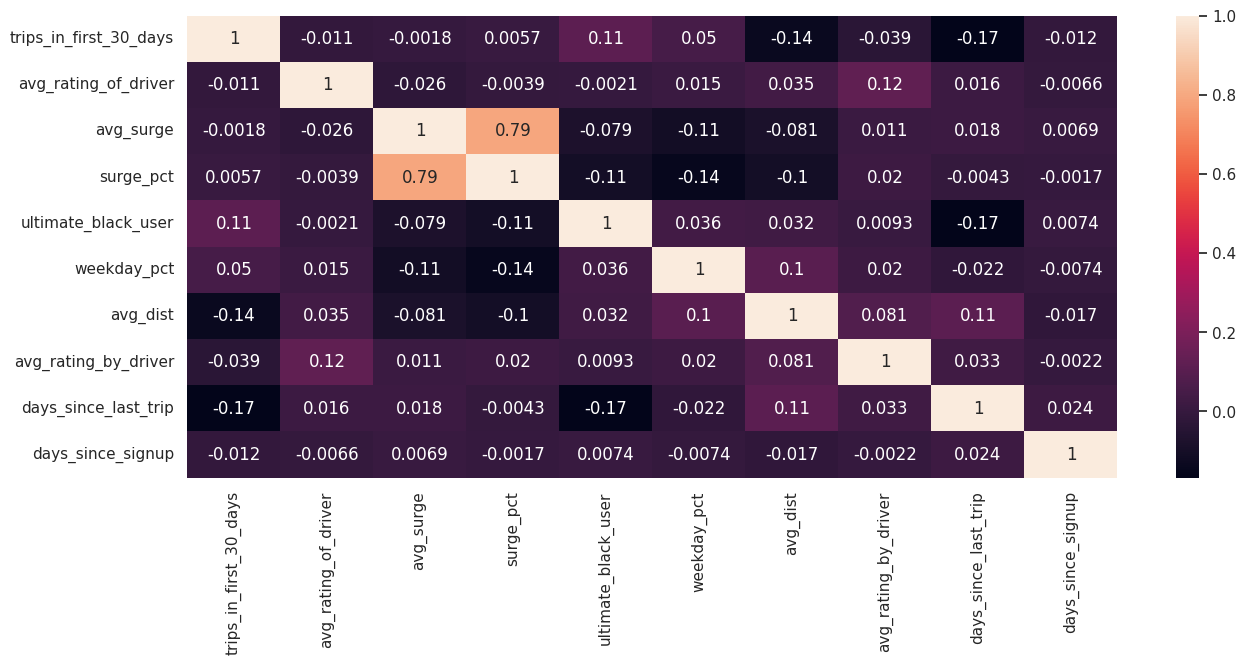

In [84]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

**Features are not highly correlated.**

## Predictive model to determine if the user is retained on 6th month

In [85]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,157,yes
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,153,no
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,176,no
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,172,yes
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108,155,no


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  days_since_last_trip    50000 non-null  int64 

In [87]:
df.isnull().sum()/len(df)

city                      0.00000
trips_in_first_30_days    0.00000
signup_date               0.00000
avg_rating_of_driver      0.16244
avg_surge                 0.00000
last_trip_date            0.00000
phone                     0.00792
surge_pct                 0.00000
ultimate_black_user       0.00000
weekday_pct               0.00000
avg_dist                  0.00000
avg_rating_by_driver      0.00402
days_since_last_trip      0.00000
days_since_signup         0.00000
retained                  0.00000
dtype: float64

## Missing Value Imputation

In [88]:
df['phone']=df['phone'].fillna(value='Other')
df['avg_rating_of_driver']=df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())
df['avg_rating_by_driver']=df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
df.isnull().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver      False
avg_surge                 False
last_trip_date            False
phone                     False
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver      False
days_since_last_trip      False
days_since_signup         False
retained                  False
dtype: bool

In [89]:
df=df.drop(['signup_date','last_trip_date'],axis=1)

## Dummies for Categorical Variables

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  days_since_last_trip    50000 non-null  int64  
 11  days_since_signup       50000 non-null  int64  
 12  retained                50000 non-null  object 
dtypes: bool(1), float64(6), int64(3), object(3)
memory usage: 4.6+ MB


In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ultimate_black_user']= le.fit_transform(df['ultimate_black_user'])
df['retained']= le.fit_transform(df['retained'])
df[['ultimate_black_user','retained']]

,ultimate_black_user,retained
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
49995,0,1
49996,0,0
49997,1,0
49998,0,0


In [92]:
cat=['city', 'phone']

In [93]:
dummies=pd.get_dummies(df[cat],drop_first=True)
df=pd.concat([df,dummies], axis=1)
df=df.drop(cat, axis=1)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,retained,city_King's Landing,city_Winterfell,phone_Other,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,14,157,1,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,57,153,0,0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,175,176,0,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,2,172,1,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,108,155,0,0,1,0,0


## Modelling

In [94]:
### Test train split and scaling
X=df.drop(['retained'], axis=1).values
y=df['retained'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Logistic Regression

Test Data Metrics:
[[6211   41]
 [  52 3696]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6252
           1       0.99      0.99      0.99      3748

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Train Data Metrics:
[[24755   189]
 [  166 14890]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24944
           1       0.99      0.99      0.99     15056

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



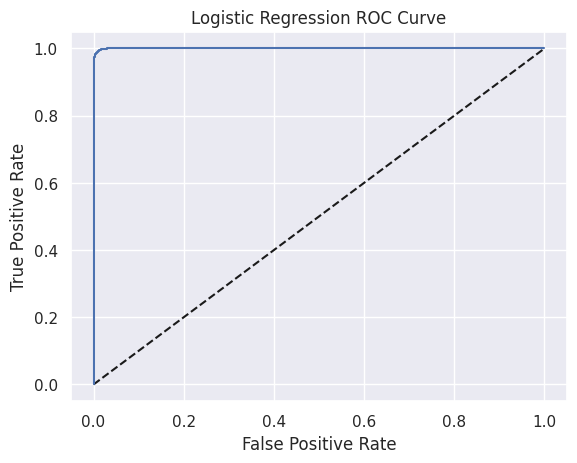

ROC_AUC Score
roc_auc (test): 1.000
roc_auc (training): 1.000


In [95]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]

#ROC_AUC Curve
from sklearn.metrics import roc_curve
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print('ROC_AUC Score')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

In [96]:
#Feature importance LR
feature_importance_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['retained'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importance_LR/max(feature_importance_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
8,days_since_last_trip,100.000000
0,trips_in_first_30_days,4.310495
10,city_King's Landing,2.599510
12,phone_Other,1.471465
5,weekday_pct,1.423623
4,ultimate_black_user,1.350622
13,phone_iPhone,1.300085
6,avg_dist,1.057343
7,avg_rating_by_driver,0.931456
11,city_Winterfell,0.697860


**The days since last trip is another form of whether the driver is retained or not. Hence, let's exclude this feature for modelling.**

In [97]:
### Test train split and scaling
X=df.drop(['retained','days_since_last_trip'], axis=1).values
y=df['retained'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Test Data Metrics:
[[5292  960]
 [1871 1877]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6252
           1       0.66      0.50      0.57      3748

    accuracy                           0.72     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.71      0.72      0.71     10000



Train Data Metrics:
[[21269  3675]
 [ 7626  7430]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79     24944
           1       0.67      0.49      0.57     15056

    accuracy                           0.72     40000
   macro avg       0.70      0.67      0.68     40000
weighted avg       0.71      0.72      0.71     40000



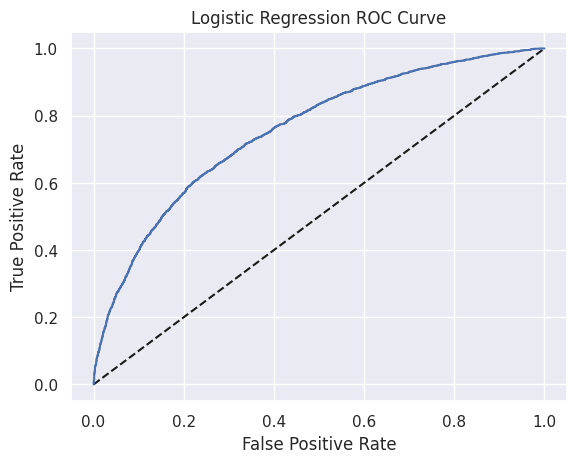

ROC_AUC Score
roc_auc (test): 0.757
roc_auc (training): 0.761


In [98]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]

#ROC_AUC Curve
from sklearn.metrics import roc_curve
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print('ROC_AUC Score')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

####  L1 Regularized LR

In [99]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)
y_pred_train= classifier_LR.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[5294  958]
 [1865 1883]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6252
           1       0.66      0.50      0.57      3748

    accuracy                           0.72     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.71      0.72      0.71     10000



Train Data Metrics:
[[21287  3657]
 [ 7606  7450]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79     24944
           1       0.67      0.49      0.57     15056

    accuracy                           0.72     40000
   macro avg       0.70      0.67      0.68     40000
weighted avg       0.71      0.72      0.71     40000

roc_auc (training): 0.762
roc_auc (test): 0.758


###  Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(random_state = 0)
classifier_DT.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_DT.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
y_pred_train=classifier_DT.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_DT.predict_proba(X_train)[:,1]

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[4802 1450]
 [1507 2241]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      6252
           1       0.61      0.60      0.60      3748

    accuracy                           0.70     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.70      0.70      0.70     10000



Train Data Metrics:
[[24944     0]
 [    4 15052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24944
           1       1.00      1.00      1.00     15056

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

roc_auc (training): 1.000
roc_auc (test): 0.683


###  Random Forest classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF=RandomForestClassifier(random_state=0)

classifier_RF.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)
y_pred_train=classifier_RF.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_RF.predict_proba(X_train)[:,1]

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[5258  994]
 [1317 2431]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      6252
           1       0.71      0.65      0.68      3748

    accuracy                           0.77     10000
   macro avg       0.75      0.74      0.75     10000
weighted avg       0.77      0.77      0.77     10000



Train Data Metrics:
[[24944     0]
 [    4 15052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24944
           1       1.00      1.00      1.00     15056

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

roc_auc (training): 1.000
roc_auc (test): 0.834


###  XgBoost

In [102]:
import xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_stat=0)

classifier_xgb.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)
y_pred_train = classifier_xgb.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:10:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "random_stat" } are not used.

  warnings.warn(smsg, UserWarning)


Test Data Metrics:
[[5331  921]
 [1239 2509]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6252
           1       0.73      0.67      0.70      3748

    accuracy                           0.78     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.78      0.78      0.78     10000



Train Data Metrics:
[[22646  2298]
 [ 3870 11186]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     24944
           1       0.83      0.74      0.78     15056

    accuracy                           0.85     40000
   macro avg       0.84      0.83      0.83     40000
weighted avg       0.84      0.85      0.84     40000

roc_auc (training): 0.917
roc_auc (test): 0.852


###  LGBM

In [103]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,

#train the model
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 15056, number of negative: 24944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376400 -> initscore=-0.504857
[LightGBM] [Info] Start training from score -0.504857
Test Data Metrics:
[[5391  861]
 [1315 2433]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6252
           1       0.74     

In [104]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['retained','days_since_last_trip'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
5,weekday_pct,100.000000
0,trips_in_first_30_days,79.007634
9,city_King's Landing,67.175573
4,ultimate_black_user,53.435115
6,avg_dist,52.671756
3,surge_pct,47.328244
12,phone_iPhone,46.183206
10,city_Winterfell,32.824427
7,avg_rating_by_driver,30.152672
1,avg_rating_of_driver,24.618321


**LightGBM performs better than all other models. Hence, I will choose this as a final model.**

## Hyperparameter tuning

In [105]:
# Randomized CV
param_grid = {
    'n_estimators':list(np.arange(150,200,2)),
   'colsample_bytree': list(np.linspace(0,1,11)),
    'max_depth': list(np.arange(10,100,5)),
    'num_leaves': list(np.arange(25, 100, 25)),
    'reg_alpha': [0, 1, 2.5, 5, 10,15,20],
    'reg_lambda': [0,1,2.5,5,10,15,20],
    'min_split_gain': [0.3, 0.4, 0.8,1.5],
    'scale_pos_weight':[1,1.5,2,2.5],
    'subsample': list(np.arange(0.2,1,0.1)),
    'subsample_freq': list(np.arange(10,50,5))}


import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

clf = lgb.LGBMClassifier(random_state=0)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_grid,
    n_iter=1000,
    scoring='roc_auc',
    cv=10,
    refit=True,
    random_state=0,
    verbose=True)



# Fit the object to our data
gs.fit(X_train, y_train)


print(gs.best_score_)
print(gs.best_params_)

[LightGBM] [Info] Number of positive: 13550, number of negative: 22450
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376389 -> initscore=-0.504904
[LightGBM] [Info] Start training from score -0.504904
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits 

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7cefb4c6b250>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 205, in _log_callback
    _log_native(str(msg.decode('utf-8')))
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 183, in wrapper
    return func(msg)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 200, in _log_native
    getattr(_LOGGER, _INFO_METHOD_NAME)(msg)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 133, in info
    print(msg)  # noqa: T201
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 402, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 203, in schedule
    self._event_pipe.send(b'')
  File "/usr/local/lib/python3.10/dist-packages/zmq/sugar/socket.py", line 618, in se

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

KeyboardInterrupt: 

## Final Model

In [106]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format
d_train=lgb.Dataset(X_train,y_train)

#Specifying the parameter
params={}
params['subsample_freq']=15,
params['subsample']= 0.9,
params['scale_pos_weight']= 2,
params['reg_lambda']= 2.5,
params['reg_alpha']= 2.5,
params['num_leaves']= 25,
params['min_split_gain']= 0.3,
params['max_depth']= 15,
params['colsample_bytree']= 0.5,
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss',

#train the model
clf=lgb.train(params,d_train,196)

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[LightGBM] [Info] Number of positive: 15056, number of negative: 24944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.177173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376400 -> initscore=-0.504857
[LightGBM] [Info] Start training from score -0.504857
Test Data Metrics:
[[4748 1504]
 [ 744 3004]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      6252
           1       0.67      0.80      0.73      3748

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.79      0.78      0.78     10000



Train Data Metrics:
[[19348  5596]
 [ 2694 12362]]
              pre

In [107]:
#Feature Importances
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['retained','days_since_last_trip'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
5,weekday_pct,100.000000
6,avg_dist,86.590038
0,trips_in_first_30_days,70.242656
8,days_since_signup,67.688378
3,surge_pct,62.196679
1,avg_rating_of_driver,60.536398
2,avg_surge,52.745849
7,avg_rating_by_driver,51.596424
9,city_King's Landing,14.687101
4,ultimate_black_user,14.431673


### Best Predictors for Retention

#### Visualization of the distribution of best predictors

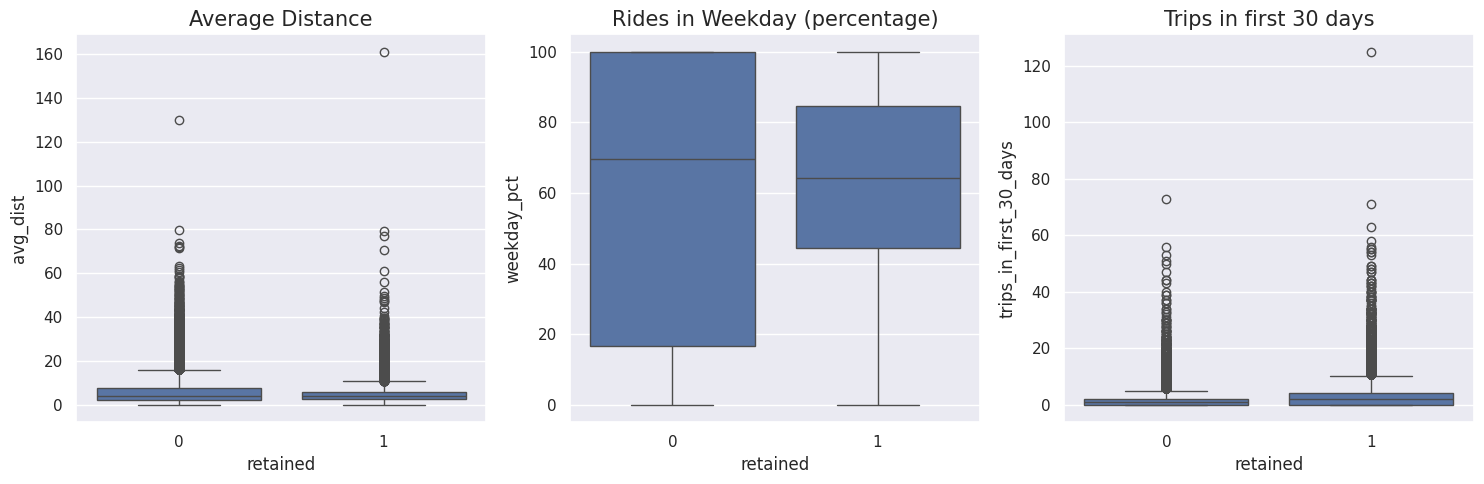

In [108]:
fig, (ax1,ax2, ax3) =plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.boxplot(data=df, x='retained', y='avg_dist', ax=ax1)
ax1.set_title('Average Distance', fontsize=15)
sns.boxplot(data=df, x='retained', y='weekday_pct', ax=ax2)
ax2.set_title('Rides in Weekday (percentage)', fontsize=15)
sns.boxplot(data=df, x='retained', y='trips_in_first_30_days', ax=ax3)
ax3.set_title('Trips in first 30 days', fontsize=15)
fig.tight_layout()

Most influential factors are: Average distance, percentagae of rides in weekdays and no. of trips made in the first 30 days. To improve the rate of retention, the company might promote riders for these three factors by providing some incentives for the drivers who drives longer trips, who works more in weekdays and who makes more tripos in the first 30 days.